# Regresion Lineal 

## Introducción

El objetivo de un modelo de regresión lineal es encontrar una relación entre una o mas variables independientes  y una variable objetivo o variable dependiente. Cuando se dispone unicamente de una variable independiente, se llama regresion lineal simple y cuando hay varias regresión lineal multiple 

El modelo de regresión lineal puede ser representado de la siguiente forma:
$$Y= \theta_0+\theta_1x_1+...+\theta_nx_n $$
donde:
* $Y$ es el valor a predecir 
* $\theta_0$ es el termino del sesgo 
* $\theta_1,...\theta_n$ son los modelos del parametro. 
* $x_1,...x_n$ son los valores que toma las variables independienes





## Un póco de Historia

A Francis Galton se le considera que fue el primero en hablar del termino regresion, esto ocurrio cuando se encontraba estudiando la relacion en la estatura que existia entre antepasados y descendientes, él encontro que los descendientes de antepasados altos tienden a retroceder hacia un valor promedio. 

Este primer trabajo fue complementado por Udny Yule y Karl Pearson agregando un contexto estadistico mas general, suponiendo que la distribucion conjunta  de las varibles respuesta y explicativas son gaussianas, pero esta idea fue revalidada entre 1922 y 1925 por  Ronald Fisher diciendo que no era necesario que la distribucion conjunta lo fuera, si no unicamente la distribucion condicional de estas variables. [ver enlace](https://en.wikipedia.org/wiki/Regression_analysis#cite_note-7)


## El planteamiento del algoritmo 

Para

## Ejemplo de Aplicación.

### Base de datos

Se utilizará una base de datos que contiene diferentes URLs a articulos sobre Machine Learning.

Las variables vienen explicadas a continuación:

* **Title**: Titulo del Artículo
* **url**: ruta al artículo
* **Word count**: la cantidad de palabras del artículo,
* **number of Links**: los enlaces externos que contiene,
* **number of comments**: cantidad de comentarios,
* **number Images video**: suma de imágenes (o videos),
* **Elapsed days**: La cantidad de días transcurridos (al momento de crear el archivo).
* **number Shares**: La cantidad de veces que se compartió el artículo.



In [25]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [54]:
data=pd.read_csv("C:/Users/000an/Desktop/Semestre 2021-I/Big Data/articulos_ml.csv")

In [4]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


A continuacion se hace un histograma sobre los variables con las que se trabajara el modelo de regresion.

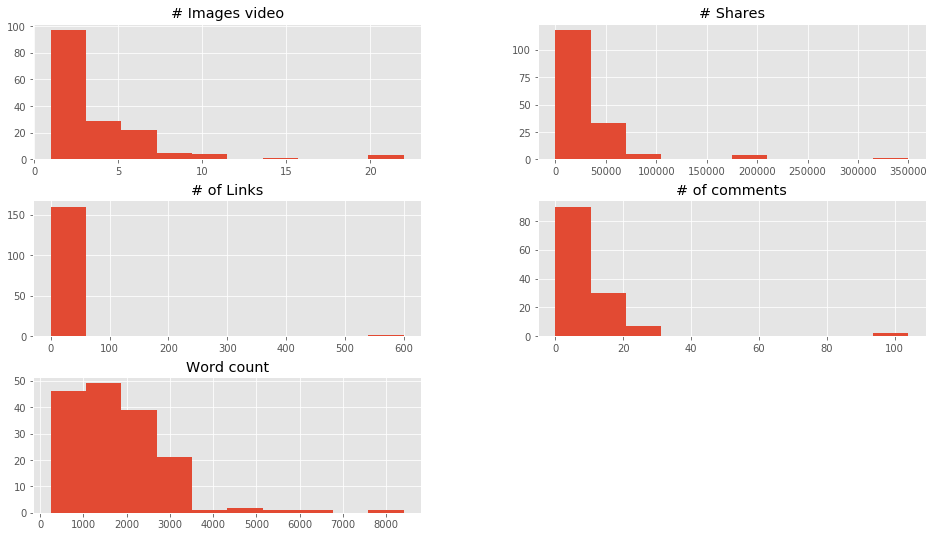

In [9]:
data.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()

Observando los anteriores histogramas se seleccionan los articulos que tengan menos de 3500 palabras y que se ha compartido menos de 80 000 veces. Se almacenan en *filtered_data*


In [10]:
data.columns.values

array(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days', '# Shares'], dtype=object)

In [14]:
filtered_data= data[(data['Word count']<=3500) & (data['# Shares']<=80000)]


En las variables $f_1$ y $f_2$ se van a almacenar los valores de las variables a analizar.

In [50]:
f1=filtered_data['Word count'].values
f2=filtered_data['# Shares'].values


In [52]:
f2=f2.reshape((148,1))
f1=f1.reshape((148,1))



In [53]:
reg = LinearRegression().fit(f1, f2)

In [36]:
y_pred=reg.predict(f1)

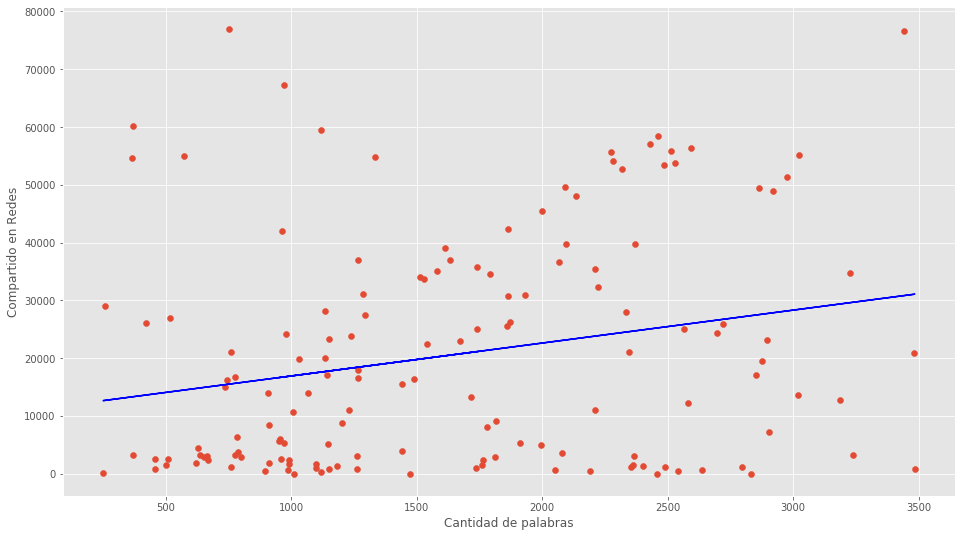

In [41]:
plt.scatter(f1,f2)
plt.xlabel('Cantidad de palabras')
plt.ylabel('Compartido en Redes')
plt.plot(f1, y_pred, color='blue')
plt.show()

In [46]:
print('Mean squared error: %.2f'
      % mean_squared_error(f2, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(f2, y_pred))

Mean squared error: 372888728.34
Coefficient of determination: 0.06
